<a href="https://colab.research.google.com/github/Drozeler/Machine-Learning/blob/main/Heart_Attack_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure

# New section

In [ ]:
df = pd.read_csv('heart.csv')
df.head(
)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


Each row in the dataset appears to represent an individual with various attributes related to heart health, and the last column "target" might indicate whether the person experienced a heart attack (1) or not (0). Here's a breakdown of the columns: age: Age of the individual. sex: Gender of the individual (1 for male, 0 for female). cp: Chest pain type. trestbps: Resting blood pressure. chol: Serum cholesterol level. fbs: Fasting blood sugar level. restecg: Resting electrocardiographic results. thalach: Maximum heart rate achieved. exang: Exercise induced angina (1 for yes, 0 for no). oldpeak: ST depression induced by exercise relative to rest. slope: Slope of the peak exercise ST segment. ca: Number of major vessels colored by fluoroscopy. thal: Thalassemia. target: Presence of heart attack (1 for yes, 0 for no).


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.215906
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.276350
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.415776
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.135662
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.093788
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.037065
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.148220
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.399374
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.413340
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.396015


In [ ]:
import pandas as pd

# Assuming you already have your DataFrame, let's call it df
# df = ...

# Calculate correlation matrix
correlation_matrix = df.corr()

# Set a threshold for correlation strength
threshold = 0.6  # You can adjust this based on your preferences

# Exclude self-correlations
correlation_matrix = correlation_matrix[~correlation_matrix.index.isin(correlation_matrix.columns)]

# Extract variables with correlation above the threshold
high_correlations = (correlation_matrix
                     .unstack()
                     .sort_values(ascending=False)
                     .drop_duplicates()
                     .reset_index()
                     .rename(columns={0: 'Correlation'})
                     .query(f'Correlation > {threshold}'))

print("High Correlations:")
print(high_correlations)


High Correlations:
Empty DataFrame
Columns: [level_0, level_1, Correlation]
Index: []


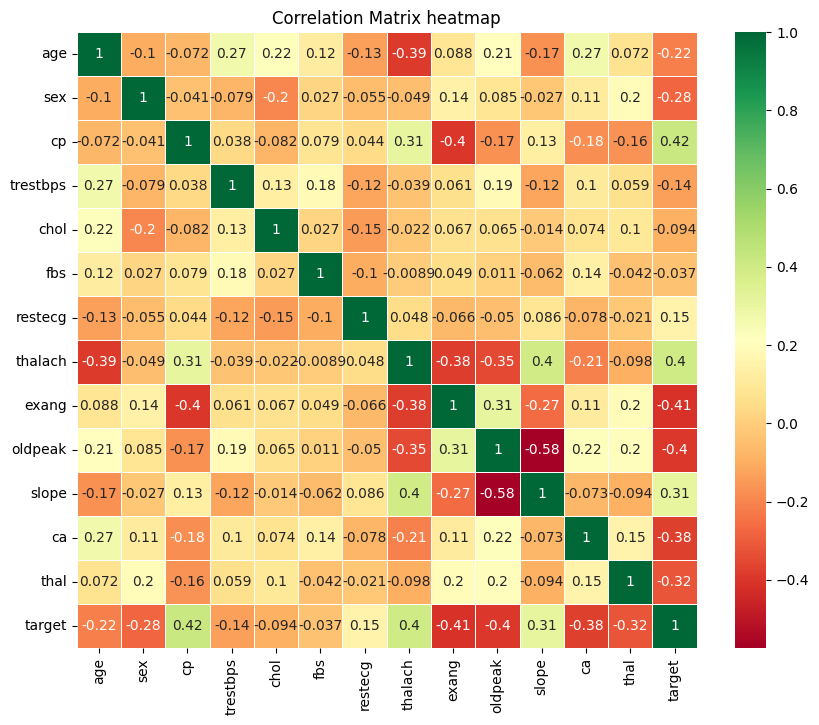

In [ ]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", linewidths=.5)
plt.title('Correlation Matrix heatmap')
plt.show()


In [ ]:
import pandas as pd

# Assuming you already have your DataFrame, let's call it df
# df = ...

# Calculate correlation matrix
correlation_matrix = df.corr()

# Set a threshold for correlation strength
threshold = 0.2  # You can adjust this based on your preferences

# Extract variable pairs with correlation above or below the threshold, excluding same-variable correlations
high_correlations = (correlation_matrix
                     .unstack()
                     .reset_index()
                     .rename(columns={0: 'Correlation'})
                     .query(f'abs(Correlation) > {threshold} and level_0 != level_1'))

print("High Correlations:")
print(high_correlations)
variable_names = pd.concat([high_correlations['level_0'], high_correlations['level_1']]).unique()

print("Variables with High Correlations:")
print(variable_names)


High Correlations:
      level_0   level_1  Correlation
3         age  trestbps     0.271121
4         age      chol     0.219823
7         age   thalach    -0.390227
9         age   oldpeak     0.208137
11        age        ca     0.271551
13        age    target    -0.215906
27        sex    target    -0.276350
35         cp   thalach     0.306839
36         cp     exang    -0.401513
41         cp    target     0.415776
42   trestbps       age     0.271121
56       chol       age     0.219823
98    thalach       age    -0.390227
100   thalach        cp     0.306839
106   thalach     exang    -0.380281
107   thalach   oldpeak    -0.349796
108   thalach     slope     0.395308
109   thalach        ca    -0.207888
111   thalach    target     0.399374
114     exang        cp    -0.401513
119     exang   thalach    -0.380281
121     exang   oldpeak     0.310844
122     exang     slope    -0.267335
125     exang    target    -0.413340
126   oldpeak       age     0.208137
133   oldpeak   tha

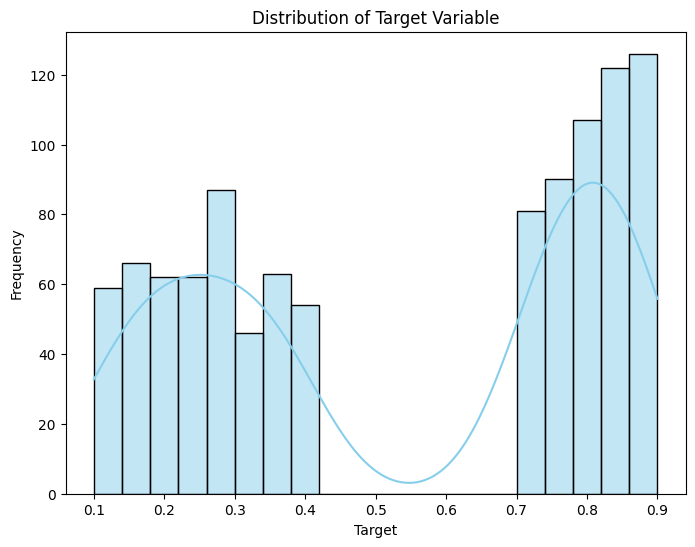

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['target'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

In [ ]:
mean = df.mean()
mean

age          54.434146
sex           0.695610
cp            0.942439
trestbps    131.611707
chol        246.000000
fbs           0.149268
restecg       0.529756
thalach     149.114146
exang         0.336585
oldpeak       1.071512
slope         1.385366
ca            0.754146
thal          2.323902
target        0.536390
dtype: float64

In [ ]:
mode = df.mode()
mode

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1.0,0.0,120.0,204,0.0,1.0,162.0,0.0,0.0,1.0,0.0,2.0,0.78
1,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

# Assuming you have your DataFrame, let's call it df
# df = ...

# Loop through each column
for column in df.columns:
    # Calculate the mode(s) for the current column
    modes = df[column].mode()

    # Check if there is at least one mode
    if not modes.empty:
        dominant_mode = modes.iloc[0]

        # Count occurrences of the dominant mode
        mode_count = (df[column] == dominant_mode).sum()

        # Calculate the percentage
        total_count = len(df[column])
        percentage = (mode_count / total_count) * 100

        print(f"{column}: {dominant_mode}, {percentage:.2f}% of the data.")
    else:
        print(f"For column '{column}', no mode found.")


age: 58, 6.63% of the data.
sex: 1, 69.56% of the data.
cp: 0, 48.49% of the data.
trestbps: 120, 12.49% of the data.
chol: 204, 2.05% of the data.
fbs: 0, 85.07% of the data.
restecg: 1, 50.05% of the data.
thalach: 162, 3.41% of the data.
exang: 0, 66.34% of the data.
oldpeak: 0.0, 32.10% of the data.
slope: 1, 47.02% of the data.
ca: 0, 56.39% of the data.
thal: 2, 53.07% of the data.
target: 0.78, 3.32% of the data.


In [ ]:
median = df.median()
median

age          56.00
sex           1.00
cp            1.00
trestbps    130.00
chol        240.00
fbs           0.00
restecg       1.00
thalach     152.00
exang         0.00
oldpeak       0.80
slope         1.00
ca            0.00
thal          2.00
target        0.71
dtype: float64

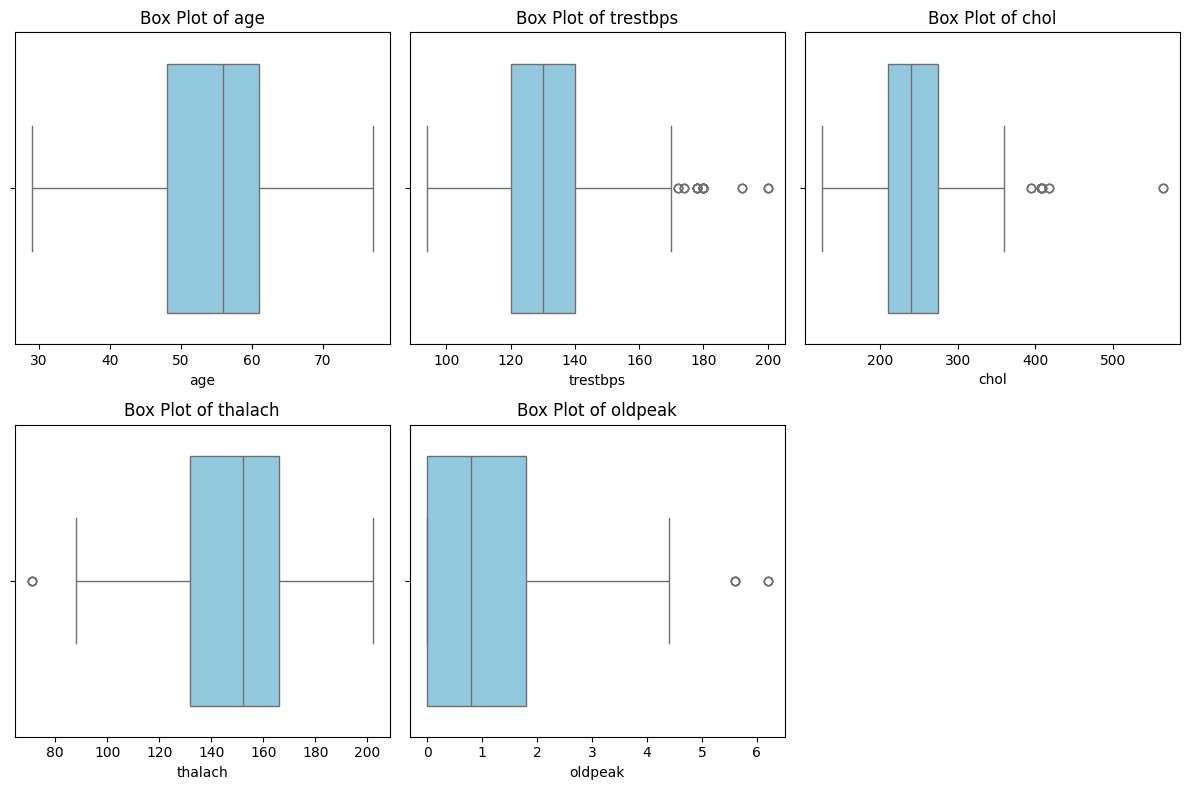

In [ ]:
quantitative_variables = ['age','trestbps','chol','thalach','oldpeak']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(quantitative_variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
bins = [29, 45, 60, 100]
labels = ['Young', 'Middle-aged', 'Senior']
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [ ]:
df['total_risk'] = df['trestbps'] + df['chol']

In [ ]:
threshold_heart_rate = 150
df['exercise_angina'] = (df['exang'] == 1) & (df['thalach'] > threshold_heart_rate)

In [ ]:
df['cholesterol_hdl_ratio'] = df['chol'] / df['thalach']

In [ ]:
df['target'] = df['target'].apply(lambda x: 1 if x >= 0.5 else 0)

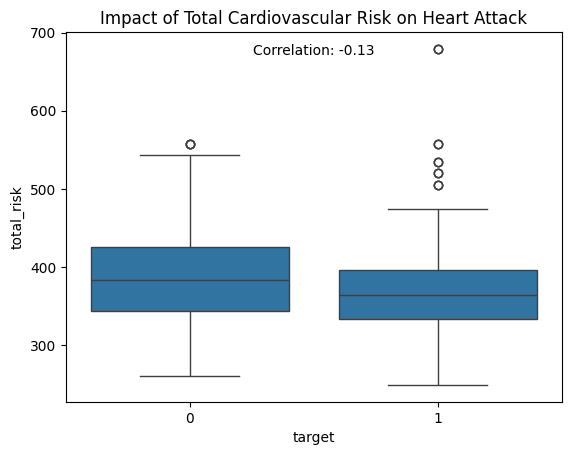

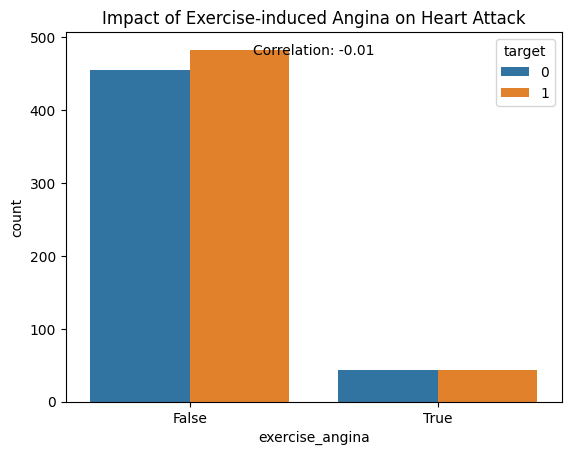

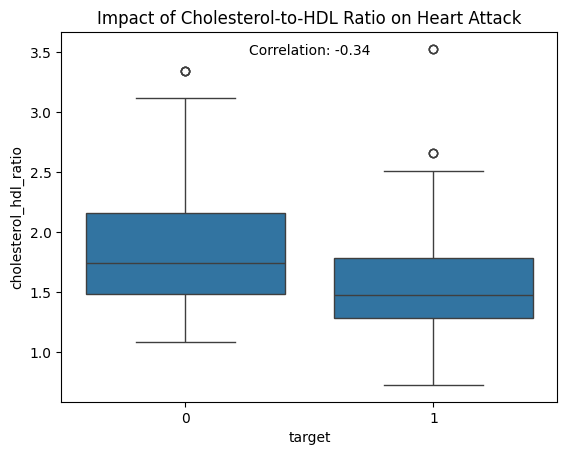

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot 1: Impact of Total Cardiovascular Risk on Heart Attack
sns.boxplot(x='target', y='total_risk', data=df)
plt.title('Impact of Total Cardiovascular Risk on Heart Attack')

# Calculate correlation
corr_total_risk = df['target'].corr(df['total_risk'])
plt.text(0.5, 0.95, f'Correlation: {corr_total_risk:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()

# Plot 2: Impact of Exercise-induced Angina on Heart Attack
sns.countplot(x='exercise_angina', hue='target', data=df)
plt.title('Impact of Exercise-induced Angina on Heart Attack')

# Calculate correlation
corr_exercise_angina = df['target'].corr(df['exercise_angina'].astype(int))
plt.text(0.5, 0.95, f'Correlation: {corr_exercise_angina:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()

# Plot 3: Impact of Cholesterol-to-HDL Ratio on Heart Attack
sns.boxplot(x='target', y='cholesterol_hdl_ratio', data=df)
plt.title('Impact of Cholesterol-to-HDL Ratio on Heart Attack')

# Calculate correlation
corr_cholesterol_hdl_ratio = df['target'].corr(df['cholesterol_hdl_ratio'])
plt.text(0.5, 0.95, f'Correlation: {corr_cholesterol_hdl_ratio:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()


In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,total_risk,exercise_angina,cholesterol_hdl_ratio
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Middle-aged,337,False,1.261905
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Middle-aged,343,True,1.309677
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Senior,319,False,1.392000
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Senior,351,False,1.260870
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Senior,432,False,2.773585
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,Middle-aged,348,False,2.032787
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,Middle-aged,432,False,2.271429
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0,Middle-aged,449,False,1.993103
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0,Middle-aged,369,False,1.729167
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0,Middle-aged,408,False,2.465517


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = df[['age', 'sex', 'chol', 'trestbps', 'thalach', 'exang', 'oldpeak']]
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
Lr_model = LogisticRegression(random_state=42)

# Train the model on the training set
Lr_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = Lr_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.75

Confusion Matrix:
[[74 28]
 [23 80]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       102
           1       0.74      0.78      0.76       103

    accuracy                           0.75       205
   macro avg       0.75      0.75      0.75       205
weighted avg       0.75      0.75      0.75       205



In [ ]:
X = df[['age', 'sex', 'chol', 'trestbps', 'thalach', 'exang', 'oldpeak']]
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
rfmodel = RandomForestClassifier(random_state=42)

# Train the model on the training set
rfmodel.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfmodel.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 1.00

Confusion Matrix:
[[102   0]
 [  0 103]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}\n")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.99

Confusion Matrix:
 [[102   0]
 [  3 100]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

